In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.model_selection import train_test_split

from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/DACON CUP'

train_df = pd.read_csv(path + '/open_data/train.csv', encoding = 'euc-kr')
train_df.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  19008 non-null  object
 1   사용자       19008 non-null  int64 
 2   세션        19008 non-null  int64 
 3   신규방문자     19008 non-null  int64 
 4   페이지뷰      19008 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 742.6+ KB


In [5]:
# date 기준으로.

train_df['DateTime'] = pd.to_datetime(train_df.DateTime) #dtype: datetime으로 변경
train_df['date'] = train_df.DateTime.dt.date
train_df  = train_df.groupby('date').sum().reset_index()
train_df.head()

,date,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,281,266,73,1826
1,2018-09-10,264,247,51,2092
2,2018-09-11,329,310,58,1998
3,2018-09-12,300,287,45,2595
4,2018-09-13,378,344,50,3845


In [6]:
# date 기준 변수 만들기



def create_features(df):
    """
    Creates time series features from datetime index
    """
    # df['DateTime'] = df.index
    # df['hour'] = df['date'].dt.hour
    df['dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek #요일
    df['quarter'] = pd.to_datetime(df['date']).dt.quarter 
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['year'] = pd.to_datetime(df['date']).dt.year # 날짜의 해당 연도 시작에서부터의 일 수를 반환 
    df['dayofyear'] = pd.to_datetime(df['date']).dt.dayofyear
    df['dayofmonth'] = pd.to_datetime(df['date']).dt.day
    df['weekofyear'] = pd.to_datetime(df['date']).dt.weekofyear
    
    X = df[['사용자','세션','신규방문자','페이지뷰','date','dayofweek','quarter','month','year' #]]
           ,'dayofyear','dayofmonth','weekofyear']]
    X.set_index('date', inplace = True)
    X.index = pd.to_datetime(X.index)
    return X

In [29]:
train = create_features(train_df)
train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


,사용자,세션,신규방문자,페이지뷰,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,
2018-09-09,281,266,73,1826,6,3,9,2018,252,9,36
2018-09-10,264,247,51,2092,0,3,9,2018,253,10,37
2018-09-11,329,310,58,1998,1,3,9,2018,254,11,37
2018-09-12,300,287,45,2595,2,3,9,2018,255,12,37
2018-09-13,378,344,50,3845,3,3,9,2018,256,13,37
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,4516,4472,1196,112683,2,4,11,2020,309,4,45
2020-11-05,4155,4037,1044,102901,3,4,11,2020,310,5,45
2020-11-06,3663,3576,825,88015,4,4,11,2020,311,6,45


In [30]:
# len(train['dayofyear'].unique())

- 19년 5월부터

In [31]:
train = train[234:]
train.head()

,사용자,세션,신규방문자,페이지뷰,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,
2019-05-01,590,632,309,7216,2,2,5,2019,121,1,18
2019-05-02,453,482,151,5381,3,2,5,2019,122,2,18
2019-05-03,490,519,181,6995,4,2,5,2019,123,3,18
2019-05-04,481,496,170,6076,5,2,5,2019,124,4,18
2019-05-05,348,347,119,4805,6,2,5,2019,125,5,18


##### EDA 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_

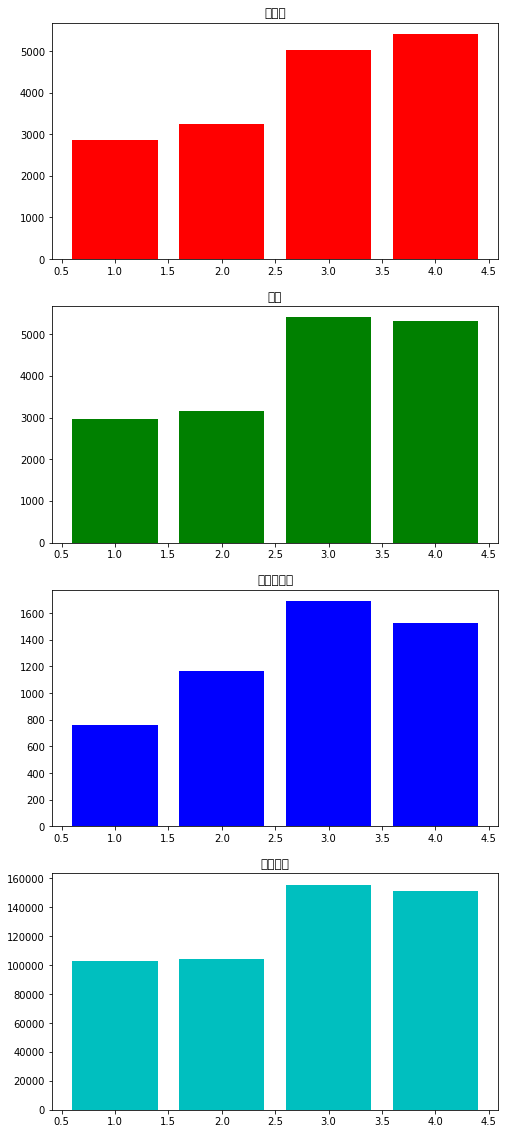

In [ ]:
# quarter간에 차이가 있는지 확인

fig, axes = plt.subplots(4, 1, figsize=(8, 20))
axes[0].bar(train['quarter'], train['사용자'], color='r')
axes[1].bar(train['quarter'], train['세션'], color='g')
axes[2].bar(train['quarter'], train['신규방문자'], color='b')
axes[3].bar(train['quarter'], train['페이지뷰'], color='c')
for i, title in enumerate(['사용자','세션','신규방문자','페이지뷰']):
    axes[i].set_title(title)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_

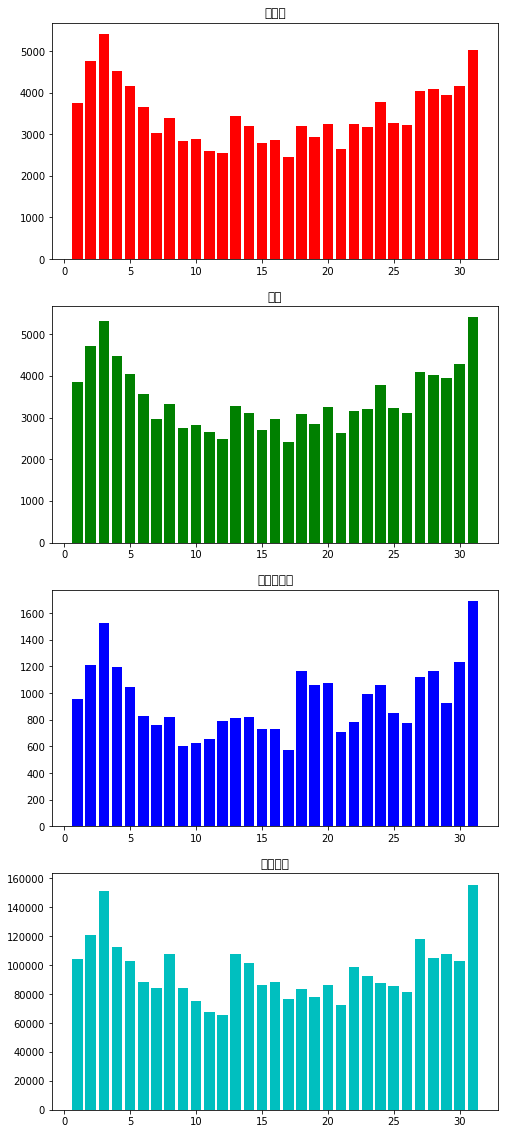

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(8, 20))
axes[0].bar(train['dayofmonth'], train['사용자'], color='r')
axes[1].bar(train['dayofmonth'], train['세션'], color='g')
axes[2].bar(train['dayofmonth'], train['신규방문자'], color='b')
axes[3].bar(train['dayofmonth'], train['페이지뷰'], color='c')
for i, title in enumerate(['사용자','세션','신규방문자','페이지뷰']):
    axes[i].set_title(title)
plt.show()

#### 범주형 인코딩

- one-hot 인코딩: 카테고리가 별로 없는거
- binary 인코딩: 카테고리가 많은 거

In [32]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.5MB/s 


In [33]:
import category_encoders as ce

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
# bianry encoding

# dayofyear	dayofmonth	weekofyear

encoder = ce.BinaryEncoder(cols=['dayofyear'])
train = encoder.fit_transform(train)

encoder = ce.BinaryEncoder(cols=['dayofmonth'])
train = encoder.fit_transform(train)

encoder = ce.BinaryEncoder(cols=['weekofyear'])
train = encoder.fit_transform(train)

print(train.shape)
# train.head(3)

(558, 31)


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [35]:
# one-hot encoding

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["dayofweek", "quarter", "month", "year"]
train = dummy_data(train,dummy_columns)

print(train.shape)
train.head(3)

(558, 52)


,사용자,세션,신규방문자,페이지뷰,dayofyear_0,dayofyear_1,dayofyear_2,dayofyear_3,dayofyear_4,dayofyear_5,dayofyear_6,dayofyear_7,dayofyear_8,dayofyear_9,dayofmonth_0,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,weekofyear_0,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,quarter_1,quarter_2,quarter_3,quarter_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2019,year_2020
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-01,590,632,309,7216,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2019-05-02,453,482,151,5381,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2019-05-03,490,519,181,6995,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


- 추가데이터 가공

In [36]:
'''
user =  pd.read_csv(path + '/open_data/info_user.csv', encoding = 'euc-kr')
login = pd.read_csv(path +'/open_data/info_login.csv', encoding = 'euc-kr')
competition = pd.read_csv(path +'/open_data/info_competition.csv', encoding = 'euc-kr')
info_submission =  pd.read_csv(path +'/open_data/info_submission.csv', encoding = 'euc-kr')
'''

"\nuser =  pd.read_csv(path + '/open_data/info_user.csv', encoding = 'euc-kr')\nlogin = pd.read_csv(path +'/open_data/info_login.csv', encoding = 'euc-kr')\ncompetition = pd.read_csv(path +'/open_data/info_competition.csv', encoding = 'euc-kr')\ninfo_submission =  pd.read_csv(path +'/open_data/info_submission.csv', encoding = 'euc-kr')\n"

- 데이터 전처리

In [37]:
# scaling

mini = train.iloc[:,:4].min()
size = train.iloc[:,:4].max() - train.iloc[:,:4].min()
train.iloc[:,:4] = (train.iloc[:,:4] -  mini) / size
train

,사용자,세션,신규방문자,페이지뷰,dayofyear_0,dayofyear_1,dayofyear_2,dayofyear_3,dayofyear_4,dayofyear_5,dayofyear_6,dayofyear_7,dayofyear_8,dayofyear_9,dayofmonth_0,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,weekofyear_0,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,quarter_1,quarter_2,quarter_3,quarter_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2019,year_2020
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-01,0.108732,0.116873,0.182249,0.046412,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2019-05-02,0.083441,0.089091,0.088757,0.034607,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2019-05-03,0.090271,0.095944,0.106509,0.044990,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2019-05-04,0.088610,0.091684,0.100000,0.039078,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2019-05-05,0.064058,0.064086,0.069822,0.030901,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,0.833487,0.828116,0.707101,0.724949,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2020-11-05,0.766845,0.747546,0.617160,0.662015,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2020-11-06,0.676020,0.662160,0.487574,0.566244,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [39]:
# scaling

input_window = 61
output_window = 61 # 7

window_x = np.zeros((train.shape[0] - (input_window + output_window), input_window, 52))
window_y = np.zeros((train.shape[0] - (input_window + output_window), output_window, 4))

for start in range(train.shape[0] - (input_window + output_window)):
    end = start + input_window    
    window_x[start,:, :] = train.iloc[start : end                , : ].values
    window_y[start,:, :] = train.iloc[end   : end + output_window, :4 ].values


print('window_x.shape: ', window_x.shape)
print('window_y.shape: ', window_y.shape)

window_x.shape:  (436, 61, 52)
window_y.shape:  (436, 61, 4)


In [ ]:
# window_x

- 시계열 데이터 임베딩 찾아서 적용해보기
- 스케일링 다르게 해보기
- dropout 적용해보기

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Input, TimeDistributed
from tensorflow.keras.models import Model


optimizer = Adam, loss = mse, activation_function = 따로지정x

In [265]:
tf.random.set_seed(40)


model = Sequential()
model.add(LSTM(32, input_shape=(61, 52), return_sequences=True))  # (timestep, features)
model.add(LSTM(32, return_sequences=True)) 
model.add(LSTM(32, return_sequences=True)) 
model.add(LSTM(32, return_sequences=True)) 
#model.add(LSTM(32, return_sequences=True)) 
# model.add(LSTM(32, return_sequences=True)) 
model.add(TimeDistributed(Dense(4)))

model.summary()

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

model.fit(window_x, window_y, epochs=100, batch_size=20)

# lstm2층 - epochs100, batch_size=10

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 61, 32)            10880     
_________________________________________________________________
lstm_47 (LSTM)               (None, 61, 32)            8320      
_________________________________________________________________
lstm_48 (LSTM)               (None, 61, 32)            8320      
_________________________________________________________________
lstm_49 (LSTM)               (None, 61, 32)            8320      
_________________________________________________________________
time_distributed_12 (TimeDis (None, 61, 4)             132       
Total params: 35,972
Trainable params: 35,972
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 9s 84ms/step - loss: 0.0528
Epoch 2/100
22/22 [===============

## test : last_df

In [266]:
# train은 이미 위에서 minmax scaler적용되어있음.

last_df = train.iloc[-61:,:].values[np.newaxis,...] # np.newaxis: 3D로 차원을 늘려줌. 
last_df.shape

(1, 61, 52)

In [267]:
pred_last = model.predict(last_df)
pred_last[:5]

array([[[0.71587   , 0.72034526, 0.6759979 , 0.58488715],
        [0.7397237 , 0.75399745, 0.7969954 , 0.6217729 ],
        [0.62889373, 0.6372732 , 0.58858037, 0.57646024],
        [0.69361305, 0.7186068 , 0.7059468 , 0.5773642 ],
        [0.5787804 , 0.58776647, 0.5044997 , 0.53013825],
        [0.31247482, 0.31610817, 0.20515141, 0.24592538],
        [0.39767033, 0.377909  , 0.30472952, 0.2883219 ],
        [0.6824861 , 0.66611046, 0.6930804 , 0.54794455],
        [0.56042844, 0.5536523 , 0.52758   , 0.4912828 ],
        [0.54037815, 0.5260278 , 0.42981076, 0.47212008],
        [0.6105034 , 0.59585094, 0.52518606, 0.5347564 ],
        [0.6208357 , 0.6038232 , 0.53555727, 0.59457636],
        [0.36210662, 0.3564192 , 0.2588402 , 0.29535812],
        [0.37430656, 0.3453511 , 0.25108057, 0.2799863 ],
        [0.69961977, 0.66304874, 0.61816794, 0.6141696 ],
        [0.5144605 , 0.489012  , 0.38954207, 0.43689644],
        [0.53115785, 0.49925858, 0.39360425, 0.43835506],
        [0.552

In [268]:
pred_last = pred_last.reshape(output_window,4)
pred_last = pred_last * size[:4].values + mini[:4].values
pred_last = pred_last.astype(int)
pred_last


array([[  3878,   3890,   1143,  90912],
       [  4008,   4071,   1347,  96646],
       [  3407,   3441,    995,  89602],
       [  3758,   3880,   1194,  89743],
       [  3136,   3174,    853,  82402],
       [  1693,   1707,    347,  38226],
       [  2155,   2041,    515,  44816],
       [  3698,   3597,   1172,  85170],
       [  3036,   2990,    892,  76363],
       [  2928,   2841,    727,  73385],
       [  3308,   3217,    888,  83120],
       [  3364,   3261,    906,  92418],
       [  1962,   1925,    438,  45910],
       [  2028,   1865,    425,  43521],
       [  3790,   3580,   1045,  95464],
       [  2787,   2641,    659,  67910],
       [  2878,   2696,    666,  68136],
       [  2995,   2825,    690,  71663],
       [  3250,   3034,    734,  89853],
       [  1770,   1624,    339,  34951],
       [  1772,   1618,    350,  35094],
       [  3292,   3089,    740,  79550],
       [  2329,   2180,    469,  45844],
       [  2270,   2137,    436,  46035],
       [  2438, 

In [269]:
pred_last.shape

(61, 4)

## submit

In [270]:
submission =  pd.read_csv(path + '/open_data/submission.csv', encoding = 'euc-kr')
submission.shape

(61, 5)

In [271]:
pred_last.shape

(61, 4)

In [272]:
pred_df = pd.DataFrame(pred_last)
pred_df.head()

,0,1,2,3
0,3878,3890,1143,90912
1,4008,4071,1347,96646
2,3407,3441,995,89602
3,3758,3880,1194,89743
4,3136,3174,853,82402


In [273]:
# 30까지 모두 채우면 다시 0부터.

for i in range(len(submission)):
  submission['사용자'][i] = pred_df[0][i]
  submission['세션'][i] = pred_df[1][i]
  submission['신규방문자'][i] = pred_df[2][i]
  submission['페이지뷰'][i] = pred_df[3][i]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Se

In [274]:
submission.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,3878,3890,1143,90912
1,2020-11-10,4008,4071,1347,96646
2,2020-11-11,3407,3441,995,89602
3,2020-11-12,3758,3880,1194,89743
4,2020-11-13,3136,3174,853,82402


In [275]:
submission.to_csv('19.05_.csv', index = False, encoding = 'euc-kr')

#### 결과 제일 좋았던, 나빴던 파일이랑 predict를 비교

In [276]:
path2 = "/content/drive/MyDrive/Colab Notebooks/DACONCUP 주희"

In [277]:
best = pd.read_csv(path + '/submit_data/submission0111_1.csv', encoding = 'euc-kr')
best.set_index('DateTime', inplace = True)
best.index = pd.to_datetime(best.index)
best.head()

,사용자,세션,신규방문자,페이지뷰
DateTime,,,,
2020-11-09,3544,3514,862,91260
2020-11-10,4455,4214,1092,117435
2020-11-11,3804,3381,744,89449
2020-11-12,4189,3832,926,101809
2020-11-13,3326,3021,760,86012


In [278]:
worst = pd.read_csv(path+'/submit_data/seed40_add 날짜feature.csv', encoding = 'euc-kr')
# worst = pd.read_csv(path2 + '/submit/lstm5 e150 b10.csv', encoding = 'euc-kr')
worst.set_index('DateTime', inplace = True)
worst.index = pd.to_datetime(best.index)
#worst.head()

In [279]:
submission.set_index('DateTime', inplace = True)
submission.index = pd.to_datetime(submission.index)
# submission.head()

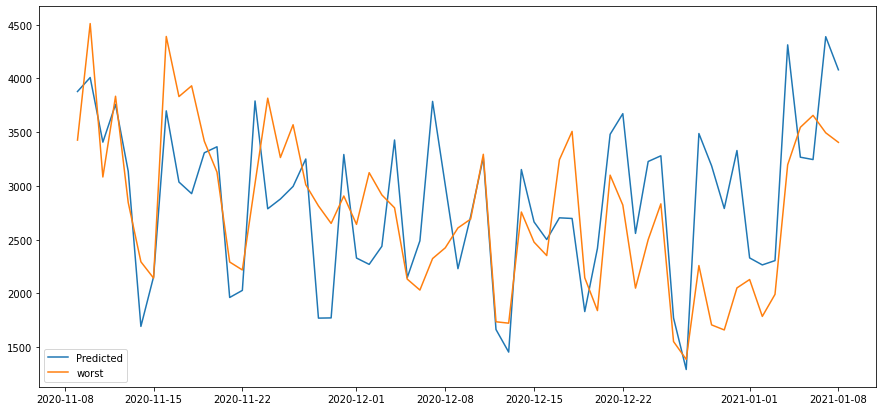

In [285]:
# plot expected vs preducted


plt.figure(figsize = (15,7))
#pyplot.plot(best['사용자'], label='best')
pyplot.plot(submission['사용자'], label='Predicted')
pyplot.plot(worst['사용자'], label = 'worst')
pyplot.legend()
pyplot.show()

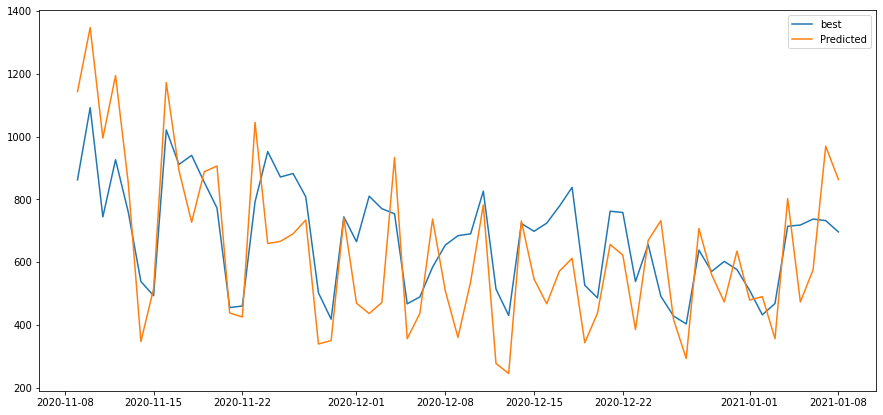

In [281]:

plt.figure(figsize = (15,7))
pyplot.plot(best['신규방문자'], label='best')
pyplot.plot(submission['신규방문자'], label='Predicted')
#pyplot.plot(worst['신규방문자'], label = 'worst')
pyplot.legend()
pyplot.show()

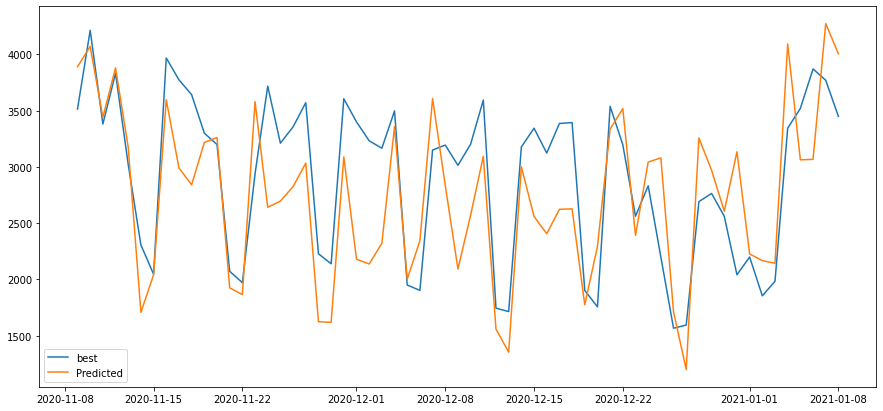

In [282]:

plt.figure(figsize = (15,7))
pyplot.plot(best['세션'], label='best')
pyplot.plot(submission['세션'], label='Predicted')
#pyplot.plot(worst['세션'], label = 'worst')
pyplot.legend()
pyplot.show()

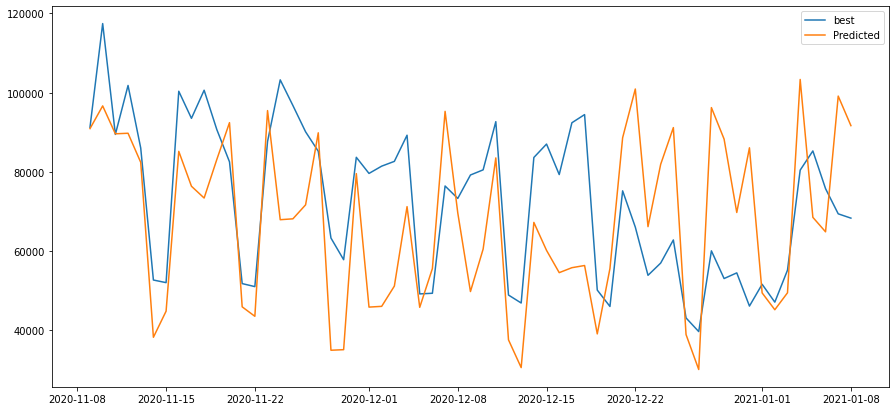

In [283]:

plt.figure(figsize = (15,7))
pyplot.plot(best['페이지뷰'], label='best')
pyplot.plot(submission['페이지뷰'], label='Predicted')
#pyplot.plot(worst['페이지뷰'], label = 'worst')
pyplot.legend()
pyplot.show()

- 위에 잘 예측하지 못하는 부분들은 조금 튀는 값인 것 같음
- 해당 일자에 어떤 특징(개최된 대회 등)을 파악
- 이후 1) 제거 또는 2) 특징 적용  (추세파악과 관련없다면 제거하기)